In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
%matplotlib inline

In [56]:
# Read file
df = pd.read_csv("ObesityDataSet.csv")

In [57]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [58]:
df.tail(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [59]:
# Height and weight are highly correlated and they directly correlate to the BMI calc used for the target
# Remove Height and Weight
df = df.drop(columns=['Height', 'Weight'])
print(df.shape)

(2111, 15)


In [60]:
# number of nulls
df[df.isnull().any(axis=1)]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [61]:
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [62]:
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())

In [63]:
# Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

variable_counts(columns, 'pre')


for col in columns:
    df[col] = round(df[col]).astype('int')

print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   family_history_with_overweight  2111 non-null   category
 3   FAVC                            2111 non-null   category
 4   FCVC                            2111 non-null   int32   
 5   NCP                             2111 non-null   int32   
 6   CAEC                            2111 non-null   category
 7   SMOKE                           2111 non-null   category
 8   CH2O                            2111 non-null   int32   
 9   SCC                             2111 non-null   category
 10  FAF                             2111 non-null   int32   
 11  TUE                             2111 non-null   int32   
 12  CALC                

In [65]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


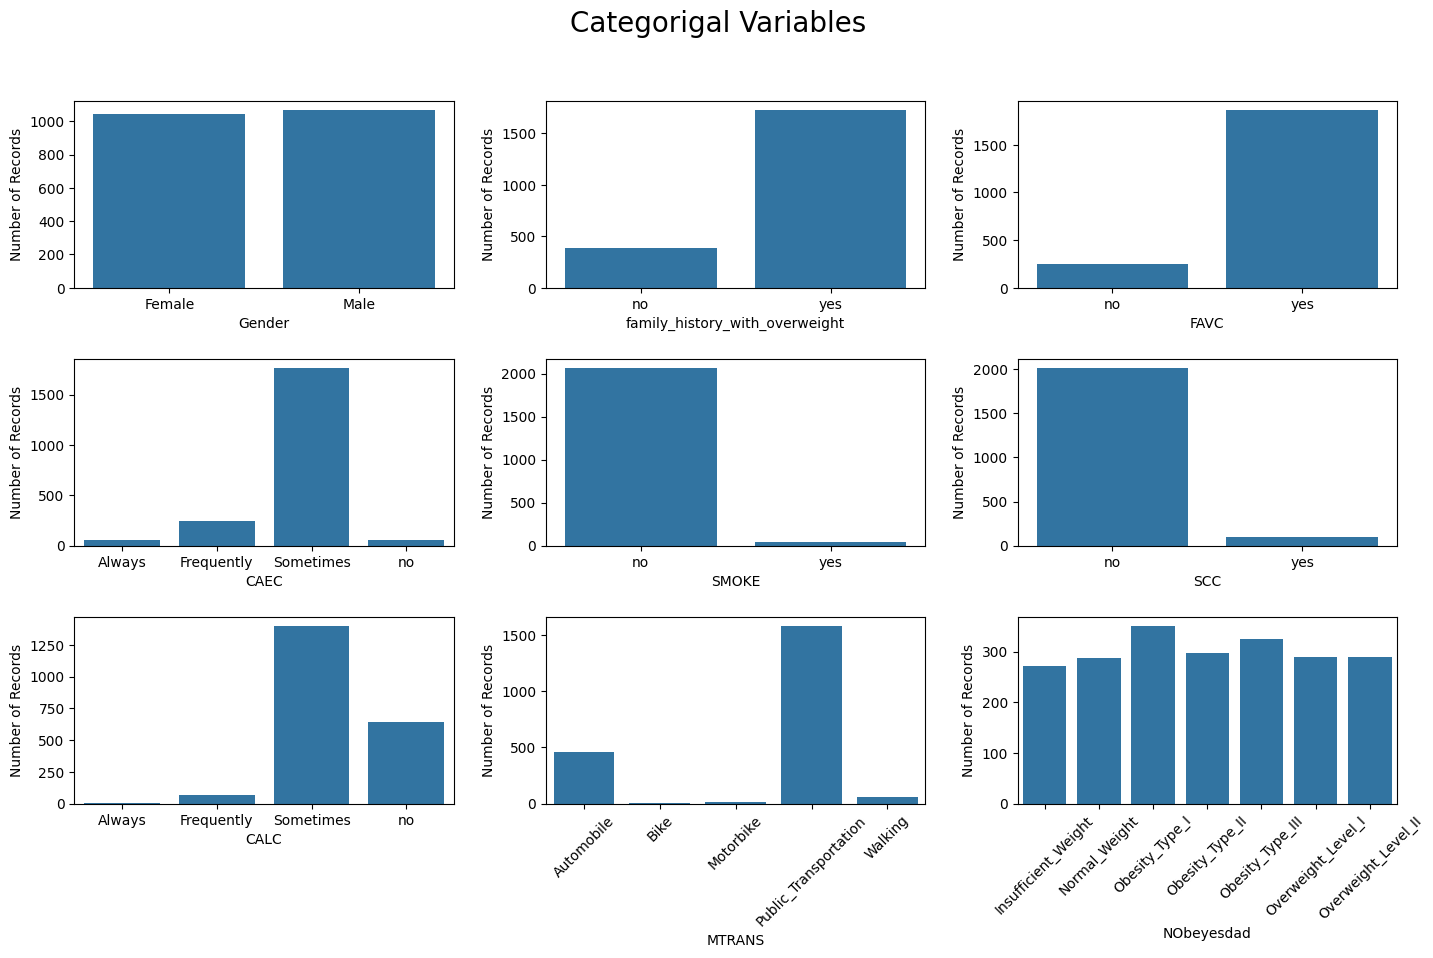

In [66]:
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):

  if col=="MTRANS":
    # plt.figure(figsize=(15,3))
    sns.countplot(x=col, data=df, ax=subplot)
    subplot.set_xticks(subplot.get_xticks())
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45)
    subplot.set_xlabel(col)
    subplot.yaxis.label.set_text("Number of Records")

  elif col=="NObeyesdad":
    # plt.figure(figsize=(13,5))
    
    sns.countplot(x=col, data=df, ax=subplot)
    subplot.set_xticks(subplot.get_xticks())
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45)
    subplot.set_xlabel(col)
    subplot.yaxis.label.set_text("Number of Records")

  else:
    # plt.figure(figsize=(5,5))
    sns.countplot(x=col, data=df, ax=subplot)
    subplot.yaxis.label.set_text("Number of Records")


fig.suptitle("Categorigal Variables", fontsize=20)
plt.tight_layout(pad=3, w_pad=2, h_pad=2)
plt.show()

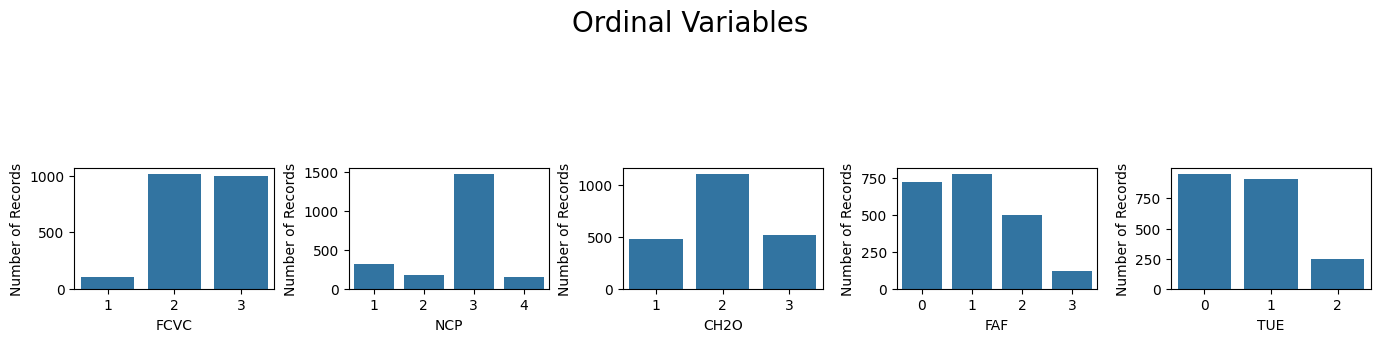

In [67]:
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]

fig, ax = plt.subplots(1, 5, figsize=(15, 4))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(x=col, data=df, ax=subplot)
    subplot.yaxis.label.set_text("Number of Records")

# show figure & plots
fig.suptitle("Ordinal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.7, h_pad=0.5)
plt.show()

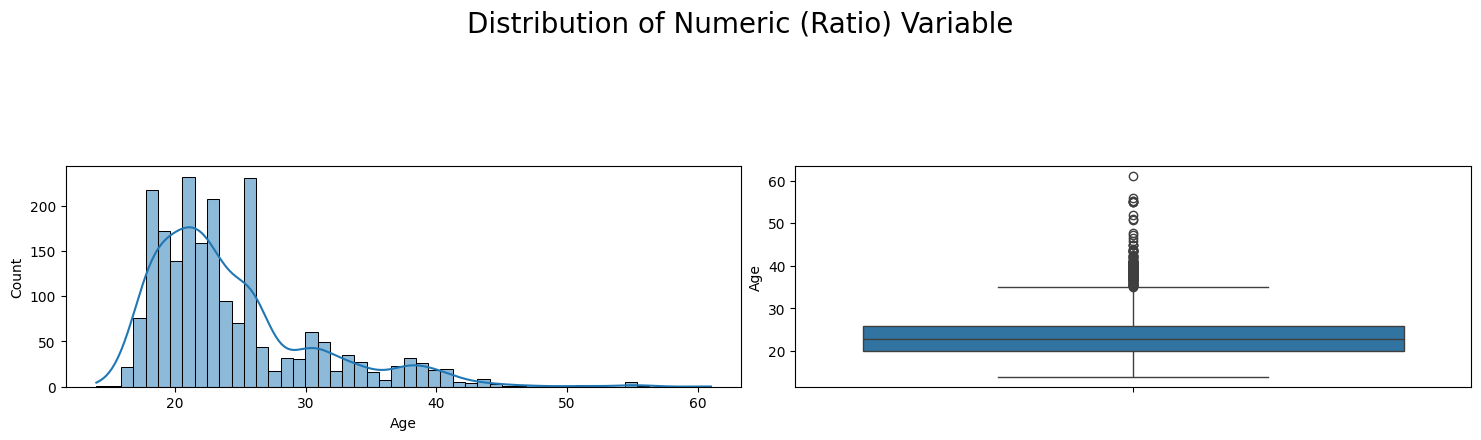

In [68]:
# ratio variable distribution

fig = plt.figure(figsize = (16,5))

#distplot
ax1 = fig.add_subplot(121)
sns.histplot(df["Age"], kde=True)

#boxplot
ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(df.Age)

# show figure & plots
fig.suptitle("Distribution of Numeric (Ratio) Variable", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

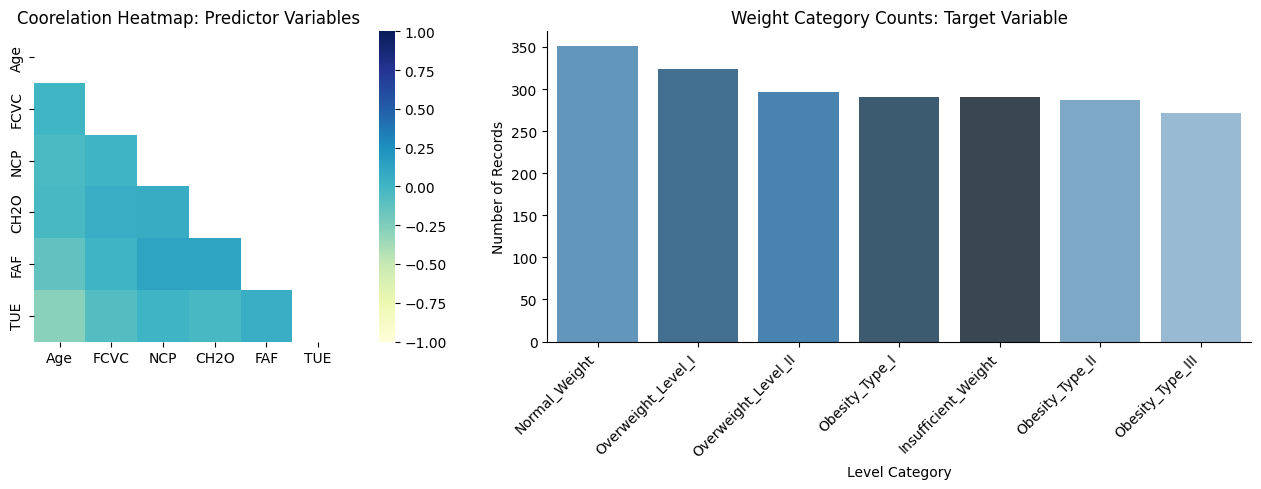

In [69]:
fig = plt.figure(figsize=(15, 5))

# add subplot for one row 2 graphs first postion
ax1 = fig.add_subplot(121)

# correlation data matrix
matrix = np.triu(df.corr(numeric_only=True))

ax1.title.set_text("Coorelation Heatmap: Predictor Variables")


sns.heatmap(df.corr(numeric_only=True),
                 mask=matrix,
                 annot = False,
                 fmt='.1g',
                 cmap="YlGnBu",
                 vmin=-1, vmax=1, center= 0,
                 square="True",
                 ax=ax1)


ax2 = fig.add_subplot(122)

ax2.set_xticks(np.arange(len(df.NObeyesdad.unique())))
ax2.set_xticklabels(rotation=45, horizontalalignment='right', labels=df.NObeyesdad.unique())

ax2.title.set_text("Weight Category Counts: Target Variable")

sns.countplot(x="NObeyesdad",
                  hue="NObeyesdad",
                 palette="Blues_d",
                 order=df.NObeyesdad.value_counts().index,
                 ax = ax2,
                 data=df,
                 legend=False)

ax2.xaxis.label.set_text("Level Category")
ax2.yaxis.label.set_text("Number of Records")

# # turn off top and right frame lines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


plt.tight_layout()
plt.show()

In [70]:
# Create correlation matrix
corr_matrix = df.corr(numeric_only=True).abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

#print highly correlated variables
print("Number of variables with > 0.95 correlation: ", len(to_drop))

Number of variables with > 0.95 correlation:  0


In [71]:
df_prep = df.copy()

In [72]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [73]:
# create dummy variables
df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
df_prep.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,Gender_Male,family_history_with_overweight_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2,3,2,0,1,Normal_Weight,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1,21.0,3,3,3,3,0,Normal_Weight,True,False,False,...,True,False,False,True,False,False,False,False,True,False
2,23.0,2,3,2,2,1,Normal_Weight,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,27.0,3,3,2,2,0,Overweight_Level_I,False,True,True,...,False,False,True,False,False,False,False,False,False,True
4,22.0,2,1,2,0,0,Overweight_Level_II,False,True,True,...,False,False,False,True,False,False,False,False,True,False


In [74]:
# split dataset in features and target variable

# Features
X = df_prep.drop(columns=["NObeyesdad"])

# Target variable
y = df_prep['NObeyesdad'] 

In [75]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 


ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)

def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")      

In [77]:
run_models(X_train, y_train, X_test, y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 0.82177
Accuracy w/Scaled Data (ss): 0.82177
Accuracy w/Scaled Data (mm): 0.82177

Classification Report (mm):
                      precision    recall  f1-score   support

Insufficient_Weight       0.85      0.87      0.86        92
      Normal_Weight       0.60      0.69      0.64        77
     Obesity_Type_I       0.85      0.80      0.82       114
    Obesity_Type_II       0.90      0.94      0.92        85
   Obesity_Type_III       0.99      0.99      0.99        92
 Overweight_Level_I       0.79      0.71      0.75        89
Overweight_Level_II       0.76      0.74      0.75        85

           accuracy                           0.82       634
          macro avg       0.82      0.82      0.82       634
       weighted avg       0.83      0.82      0.82       634

                            -----------------------------------               

Decision Tree:
------------------------------

In [78]:
from sklearn.model_selection import GridSearchCV

 
def hyper_tune(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train_scaled,y_train)
    y_pred_scaled = search.predict(X_test_scaled)
    print ("Accuracy Score = %3.2f" %(search.score(X_test_scaled,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred_scaled, target_names=target_names))

In [79]:

def hyper_tune2(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train,y_train)
    y_pred = search.predict(X_test)
    print ("Accuracy Score = %3.2f" %(search.score(X_test,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred, target_names=target_names))

In [80]:
# Number of neighbors
n_neighbors = [int(x) for x in range(4, 15)]
# weights
weights = ['uniform','distance']
# distance metric
metric = ['euclidean', 'manhattan', 'chebyshev']
# computation algorithm
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# power paramter
p=[1,2]

parameters = { 'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm              
               }

hyper_tune2('KNN', KNeighborsClassifier(), parameters)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits
Accuracy Score = 0.82
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.83      0.84      0.83        92
      Normal_Weight       0.79      0.53      0.64        77
     Obesity_Type_I       0.83      0.83      0.83       114
    Obesity_Type_II       0.84      0.94      0.89        85
   Obesity_Type_III       0.91      1.00      0.95        92
 Overweight_Level_I       0.78      0.78      0.78        89
Overweight_Level_II       0.70      0.74      0.72        85

           accuracy                           0.82       634
          macro avg       0.81      0.81      0.81       634
       weighted avg       0.81      0.82      0.81       634



In [81]:
n_estimators = [int(x) for x in range(10, 200,10)]
criterion = ['gini','entropy']

max_features = ['sqrt', 'log2', None]

max_depth = [int(x) for x in range(10, 100, 10)]
max_depth.append(None)

min_samples_split = [int(x) for x in range(2, 5)]

min_samples_leaf = [int(x) for x in range(2, 5)]

bootstrap = [True, False]

random_state = [1010]

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,
              # 'random_state': random_state,
              # 'max_features':max_features,
              # 'min_samples_split':min_samples_split             
               }


hyper_tune('Random Forest',
           RandomForestClassifier(), parameters)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
Accuracy Score = 0.82
{'criterion': 'entropy', 'max_depth': 70, 'n_estimators': 70}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.81      0.86      0.84        92
      Normal_Weight       0.60      0.64      0.62        77
     Obesity_Type_I       0.87      0.80      0.83       114
    Obesity_Type_II       0.93      0.92      0.92        85
   Obesity_Type_III       0.99      0.99      0.99        92
 Overweight_Level_I       0.79      0.72      0.75        89
Overweight_Level_II       0.73      0.80      0.76        85

           accuracy                           0.82       634
          macro avg       0.82      0.82      0.82       634
       weighted avg       0.82      0.82      0.82       634



In [82]:
from sklearn.tree import DecisionTreeClassifier

criterion = ['gini', 'entropy']
max_depth = [int(x) for x in range(10, 100, 10)] + [None]
min_samples_split = [int(x) for x in range(2, 5)]
min_samples_leaf = [int(x) for x in range(2, 5)]
max_features = ['sqrt', 'log2', None]
random_state = [1010]

parameters = {
    'criterion': criterion,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'random_state': random_state
}

hyper_tune('Decision Tree', DecisionTreeClassifier(), parameters)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Accuracy Score = 0.73
{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 1010}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.75      0.77      0.76        92
      Normal_Weight       0.45      0.57      0.50        77
     Obesity_Type_I       0.70      0.72      0.71       114
    Obesity_Type_II       0.83      0.80      0.81        85
   Obesity_Type_III       0.98      0.99      0.98        92
 Overweight_Level_I       0.74      0.64      0.69        89
Overweight_Level_II       0.69      0.59      0.64        85

           accuracy                           0.73       634
          macro avg       0.73      0.73      0.73       634
       weighted avg       0.74      0.73      0.73       634



In [83]:
C_values = [0.1, 1, 10, 100, 1000]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
gamma_values = ['scale', 'auto', 0.1, 1, 10]

svm_parameters = {
    'C': C_values,
    'kernel': kernel_values,
    'gamma': gamma_values
}

hyper_tune('SVM', SVC(), svm_parameters)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Accuracy Score = 0.79
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.88      0.87      0.87        92
      Normal_Weight       0.50      0.73      0.60        77
     Obesity_Type_I       0.81      0.69      0.75       114
    Obesity_Type_II       0.91      0.94      0.92        85
   Obesity_Type_III       0.99      0.98      0.98        92
 Overweight_Level_I       0.69      0.64      0.66        89
Overweight_Level_II       0.77      0.66      0.71        85

           accuracy                           0.79       634
          macro avg       0.79      0.79      0.79       634
       weighted avg       0.80      0.79      0.79       634



In [84]:
# Create Random Forest classifer object with optimized parameters
clf = RandomForestClassifier(criterion='entropy',
               n_estimators=130,
              max_depth = 30,              
              max_features='sqrt',
              min_samples_split=2,
              random_state=1010)

# Train Decision Tree Classifer
clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

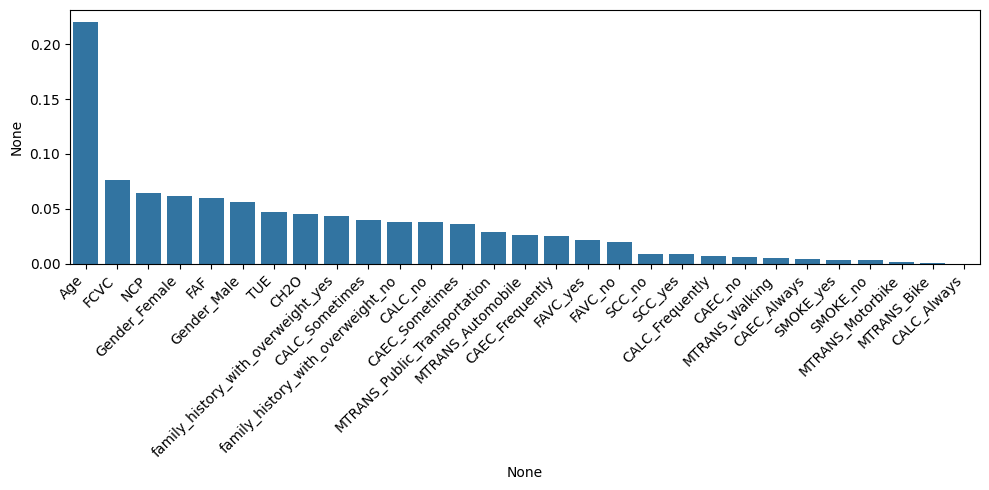


Features:
Variable: Age                  Importance: 0.22
Variable: FCVC                 Importance: 0.08
Variable: NCP                  Importance: 0.06
Variable: FAF                  Importance: 0.06
Variable: Gender_Female        Importance: 0.06
Variable: Gender_Male          Importance: 0.06
Variable: CH2O                 Importance: 0.05
Variable: TUE                  Importance: 0.05
Variable: family_history_with_overweight_no Importance: 0.04
Variable: family_history_with_overweight_yes Importance: 0.04
Variable: CAEC_Sometimes       Importance: 0.04
Variable: CALC_Sometimes       Importance: 0.04
Variable: CALC_no              Importance: 0.04
Variable: CAEC_Frequently      Importance: 0.03
Variable: MTRANS_Automobile    Importance: 0.03
Variable: MTRANS_Public_Transportation Importance: 0.03
Variable: FAVC_no              Importance: 0.02
Variable: FAVC_yes             Importance: 0.02
Variable: CAEC_no              Importance: 0.01
Variable: SCC_no               Importance:

In [85]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(10, 5))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

# create features list
features_list = X.columns
features_list = features_list.tolist()

# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print("\nFeatures:")
display_top = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


In [86]:
# map values
weight_map = { 'Normal_Weight':0, 'Overweight_Level_I':0,
               'Overweight_Level_II':0, 'Obesity_Type_I':1,
               'Obesity_Type_II':1, 'Obesity_Type_III':1, 'Insufficient_Weight':0}

# map values
df_prep['weight_cat'] = df_prep['NObeyesdad'].map(weight_map)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_924\344598672.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="weight_cat",


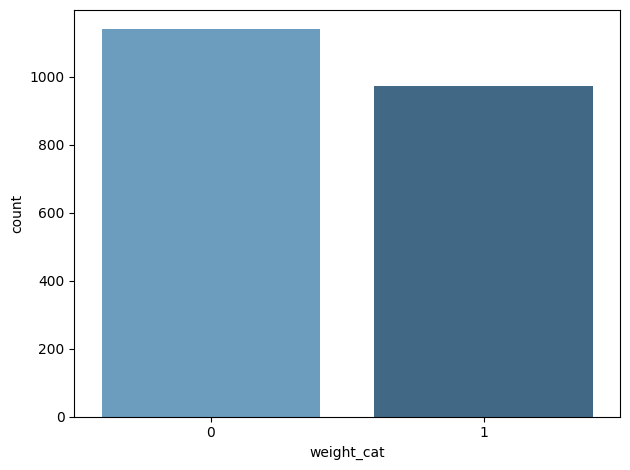

In [87]:
sns.countplot(x="weight_cat",
                 palette="Blues_d",
                 order=df_prep["weight_cat"].value_counts().index,
                 data=df_prep)

plt.tight_layout()
plt.show()

In [88]:
# Features
X = df_prep.drop(columns=["NObeyesdad","weight_cat"])

# Target variable
y = df_prep['weight_cat']


In [89]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scaled version of X train and X test
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [90]:
# Number of neighbors
n_neighbors = [int(x) for x in range(4, 15)]
# weights
weights = ['uniform','distance']
# distance metric
metric = ['euclidean', 'manhattan', 'chebyshev']
# computation algorithm
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# power paramter
p=[1,2]


target_names = ['Not Obese', 'Obese']

parameters = { 'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm              
               }

hyper_tune2('KNN', KNeighborsClassifier(), parameters, target_names=target_names)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits
Accuracy Score = 0.91
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

Classification Report:
               precision    recall  f1-score   support

   Not Obese       0.91      0.92      0.92       343
       Obese       0.90      0.90      0.90       291

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634



In [91]:
n_estimators = [int(x) for x in range(10, 200,10)]
criterion = ['gini','entropy']
max_features = [1, 'sqrt', 'log2', None]
max_depth = [int(x) for x in range(10, 100, 10)]
max_depth.append(None)
min_samples_split = [int(x) for x in range(2, 20,2)]
min_samples_leaf = [int(x) for x in range(2, 20, 2)]
bootstrap = [True, False]
random_state = [1010]

target_names = ['Not Obese', 'Obese']

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,
              'random_state': random_state,
              'max_features':max_features
              #'min_samples_split':min_samples_split
               }

hyper_tune('Random Forest', RandomForestClassifier(), parameters, target_names=target_names)



Fitting 5 folds for each of 1520 candidates, totalling 7600 fits


Accuracy Score = 0.92
{'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 110, 'random_state': 1010}

Classification Report:
               precision    recall  f1-score   support

   Not Obese       0.90      0.96      0.93       343
       Obese       0.94      0.88      0.91       291

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



In [92]:
from sklearn.tree import DecisionTreeClassifier

criterion = ['gini', 'entropy']
max_depth = [int(x) for x in range(10, 100, 10)] + [None]
min_samples_split = [int(x) for x in range(2, 5)]
min_samples_leaf = [int(x) for x in range(2, 5)]
max_features = ['sqrt', 'log2', None]
random_state = [1010]

parameters = {
    'criterion': criterion,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'random_state': random_state
}

target_names = ['Not Obese', 'Obese']

hyper_tune('Decision Tree', DecisionTreeClassifier(), parameters, target_names=target_names)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Accuracy Score = 0.88
{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 1010}

Classification Report:
               precision    recall  f1-score   support

   Not Obese       0.87      0.91      0.89       343
       Obese       0.89      0.84      0.86       291

    accuracy                           0.88       634
   macro avg       0.88      0.88      0.88       634
weighted avg       0.88      0.88      0.88       634



In [93]:
C_values = [0.1, 1, 10, 100, 1000]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
gamma_values = ['scale', 'auto', 0.1, 1, 10]

target_names = ['Not Obese', 'Obese']

svm_parameters = {
    'C': C_values,
    'kernel': kernel_values,
    'gamma': gamma_values
}

hyper_tune('SVM', SVC(), svm_parameters, target_names=target_names)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy Score = 0.90
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Classification Report:
               precision    recall  f1-score   support

   Not Obese       0.90      0.92      0.91       343
       Obese       0.90      0.88      0.89       291

    accuracy                           0.90       634
   macro avg       0.90      0.90      0.90       634
weighted avg       0.90      0.90      0.90       634



In [94]:
# Create Random Forest classifer object with optimized parameters
clf = RandomForestClassifier(criterion='gini',
               n_estimators=110,
              max_depth = 20,
              max_features='sqrt',
              min_samples_split=2,
              random_state=1010)

# Train Random Forest classifer
clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

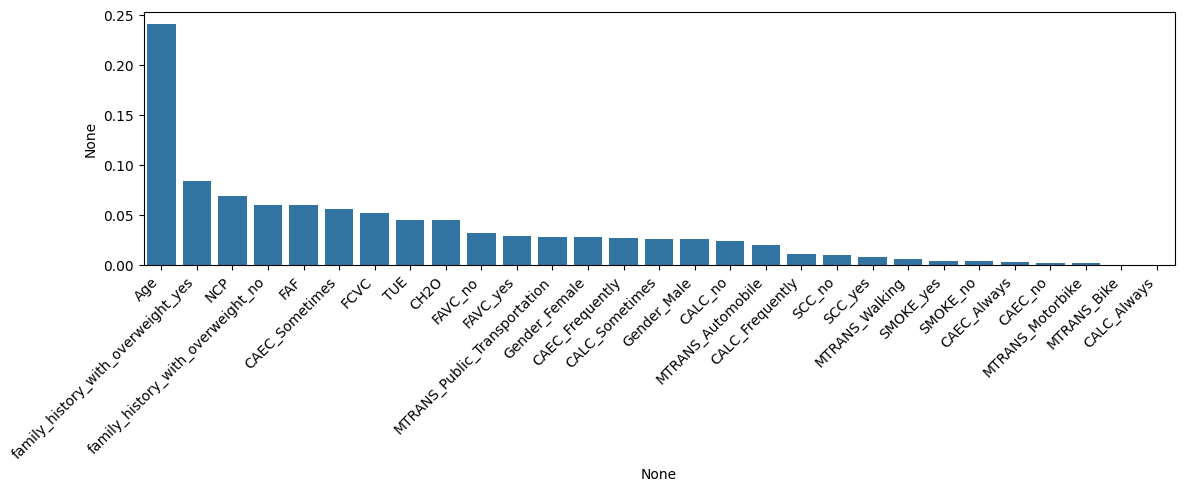


Features:
Variable: Age                  Importance: 0.24
Variable: family_history_with_overweight_yes Importance: 0.08
Variable: NCP                  Importance: 0.07
Variable: FAF                  Importance: 0.06
Variable: family_history_with_overweight_no Importance: 0.06
Variable: CAEC_Sometimes       Importance: 0.06
Variable: FCVC                 Importance: 0.05
Variable: CH2O                 Importance: 0.04
Variable: TUE                  Importance: 0.04
Variable: Gender_Female        Importance: 0.03
Variable: Gender_Male          Importance: 0.03
Variable: FAVC_no              Importance: 0.03
Variable: FAVC_yes             Importance: 0.03
Variable: CAEC_Frequently      Importance: 0.03
Variable: CALC_Sometimes       Importance: 0.03
Variable: MTRANS_Public_Transportation Importance: 0.03
Variable: CALC_no              Importance: 0.02
Variable: MTRANS_Automobile    Importance: 0.02
Variable: SCC_no               Importance: 0.01
Variable: SCC_yes              Importance:

In [95]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 5))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

# create features list
features_list = X.columns
features_list = features_list.tolist()

# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
print("\nFeatures:")
display_top = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

In [96]:
input_data = {
    'Age': 22.0,
    'FCVC': 2.0,
    'NCP': 1.0,
    'CH2O': 2.00,
    'FAF': 0.0,
    'TUE': 0.0,
    'Gender_Female': 0,  
    'Gender_Male': 1,    
    'family_history_with_overweight_no': 1,
    'family_history_with_overweight_yes': 0,
    'FAVC_no': 1,
    'FAVC_yes': 0,
    'CAEC_Always': 0,
    'CAEC_Frequently': 0,
    'CAEC_Sometimes': 1,
    'CAEC_no': 0,
    'SMOKE_no': 1,
    'SMOKE_yes': 0,
    'SCC_no': 1,
    'SCC_yes': 0,
    'CALC_Always': 0,
    'CALC_Frequently': 0,
    'CALC_Sometimes': 1,
    'CALC_no': 0,
    'MTRANS_Automobile': 0,
    'MTRANS_Bike': 0,
    'MTRANS_Motorbike': 0,
    'MTRANS_Public_Transportation': 1,
    'MTRANS_Walking': 0
}

# Convert the dictionary to a DataFrame
input_df = pd.DataFrame([input_data])

input_scaled = ss.transform(input_df)

predictions = clf.predict(input_scaled)
print("Predicted Class:", predictions)

Predicted Class: [0]


In [97]:
import pickle

# Assuming `clf` is your final model
final_model = RandomForestClassifier(criterion='gini',
               n_estimators=110,
              max_depth = 20,
              max_features='sqrt',
              min_samples_split=2,
              random_state=1010)

# Fit the model on your entire dataset (X_train_scaled, y_train)
final_model.fit(X_train_scaled, y_train)

# Save the model to a file using pickle
with open('final_model.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

print("Model saved as 'final_model.pkl'")


Model saved as 'final_model.pkl'
